In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [150]:
from sklearn import metrics
from sklearn.metrics  import confusion_matrix
from sklearn.metrics  import precision_score
from sklearn.metrics  import precision_recall_curve

In [151]:
import warnings
warnings.filterwarnings('ignore')

plt.style.use("ggplot")

In [152]:
score = pd.read_csv('Data_Science_Internship - Dump.csv')
pd.set_option('display.max_columns', None)

In [153]:
score.head()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [154]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      46608 non-null  int64 
 1   Agent_id        46608 non-null  object
 2   status          46608 non-null  object
 3   lost_reason     43244 non-null  object
 4   budget          42908 non-null  object
 5   lease           44267 non-null  object
 6   movein          32970 non-null  object
 7   source          46608 non-null  object
 8   source_city     46608 non-null  object
 9   source_country  46608 non-null  object
 10  utm_source      46608 non-null  object
 11  utm_medium      46608 non-null  object
 12  des_city        46608 non-null  object
 13  des_country     46608 non-null  object
 14  room_type       23061 non-null  object
 15  lead_id         46608 non-null  object
dtypes: int64(1), object(15)
memory usage: 5.7+ MB


In [155]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      46608 non-null  int64 
 1   Agent_id        46608 non-null  object
 2   status          46608 non-null  object
 3   lost_reason     43244 non-null  object
 4   budget          42908 non-null  object
 5   lease           44267 non-null  object
 6   movein          32970 non-null  object
 7   source          46608 non-null  object
 8   source_city     46608 non-null  object
 9   source_country  46608 non-null  object
 10  utm_source      46608 non-null  object
 11  utm_medium      46608 non-null  object
 12  des_city        46608 non-null  object
 13  des_country     46608 non-null  object
 14  room_type       23061 non-null  object
 15  lead_id         46608 non-null  object
dtypes: int64(1), object(15)
memory usage: 5.7+ MB


In [156]:
#missing data percentage

round(score.isnull().sum()/score.shape[0], 2)

Unnamed: 0        0.00
Agent_id          0.00
status            0.00
lost_reason       0.07
budget            0.08
lease             0.05
movein            0.29
source            0.00
source_city       0.00
source_country    0.00
utm_source        0.00
utm_medium        0.00
des_city          0.00
des_country       0.00
room_type         0.51
lead_id           0.00
dtype: float64

In [157]:
score.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Agent_id        46608 non-null  object
 1   status          46608 non-null  object
 2   lost_reason     43244 non-null  object
 3   budget          42908 non-null  object
 4   lease           44267 non-null  object
 5   movein          32970 non-null  object
 6   source          46608 non-null  object
 7   source_city     46608 non-null  object
 8   source_country  46608 non-null  object
 9   utm_source      46608 non-null  object
 10  utm_medium      46608 non-null  object
 11  des_city        46608 non-null  object
 12  des_country     46608 non-null  object
 13  room_type       23061 non-null  object
 14  lead_id         46608 non-null  object
dtypes: object(15)
memory usage: 5.3+ MB


In [158]:
score = score.replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0', np.nan)

In [159]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      46608 non-null  int64 
 1   Agent_id        46608 non-null  object
 2   status          46608 non-null  object
 3   lost_reason     43244 non-null  object
 4   budget          42908 non-null  object
 5   lease           44267 non-null  object
 6   movein          32970 non-null  object
 7   source          40631 non-null  object
 8   source_city     37757 non-null  object
 9   source_country  37967 non-null  object
 10  utm_source      46547 non-null  object
 11  utm_medium      43421 non-null  object
 12  des_city        44071 non-null  object
 13  des_country     44071 non-null  object
 14  room_type       23061 non-null  object
 15  lead_id         46608 non-null  object
dtypes: int64(1), object(15)
memory usage: 5.7+ MB


In [160]:
#dropping columns that have more than 70% of null values

score = score.drop(score.loc[:,list(round(score.isnull().sum()/score.shape[0], 2)>0.70)].columns, 1)

In [161]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      46608 non-null  int64 
 1   Agent_id        46608 non-null  object
 2   status          46608 non-null  object
 3   lost_reason     43244 non-null  object
 4   budget          42908 non-null  object
 5   lease           44267 non-null  object
 6   movein          32970 non-null  object
 7   source          40631 non-null  object
 8   source_city     37757 non-null  object
 9   source_country  37967 non-null  object
 10  utm_source      46547 non-null  object
 11  utm_medium      43421 non-null  object
 12  des_city        44071 non-null  object
 13  des_country     44071 non-null  object
 14  room_type       23061 non-null  object
 15  lead_id         46608 non-null  object
dtypes: int64(1), object(15)
memory usage: 5.7+ MB


In [162]:
round(100*(score.isnull().sum()/len(score.index)),2)

Unnamed: 0         0.00
Agent_id           0.00
status             0.00
lost_reason        7.22
budget             7.94
lease              5.02
movein            29.26
source            12.82
source_city       18.99
source_country    18.54
utm_source         0.13
utm_medium         6.84
des_city           5.44
des_country        5.44
room_type         50.52
lead_id            0.00
dtype: float64

In [163]:
#dropping the movein and room_type columns due to high volumes of missing data

score = score.drop(['movein','room_type'], 1)

In [164]:
round(100*(score.isnull().sum()/len(score.index)),2)

Unnamed: 0         0.00
Agent_id           0.00
status             0.00
lost_reason        7.22
budget             7.94
lease              5.02
source            12.82
source_city       18.99
source_country    18.54
utm_source         0.13
utm_medium         6.84
des_city           5.44
des_country        5.44
lead_id            0.00
dtype: float64

In [165]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      46608 non-null  int64 
 1   Agent_id        46608 non-null  object
 2   status          46608 non-null  object
 3   lost_reason     43244 non-null  object
 4   budget          42908 non-null  object
 5   lease           44267 non-null  object
 6   source          40631 non-null  object
 7   source_city     37757 non-null  object
 8   source_country  37967 non-null  object
 9   utm_source      46547 non-null  object
 10  utm_medium      43421 non-null  object
 11  des_city        44071 non-null  object
 12  des_country     44071 non-null  object
 13  lead_id         46608 non-null  object
dtypes: int64(1), object(13)
memory usage: 5.0+ MB


In [166]:
v = score[score["status"].str.contains('WON|LOST')]
v.head()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,NaN,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


# Exploratory Data Analysis

In [167]:
# checking data imbalance in target variable

v["status"].value_counts(normalize=True)

LOST    0.933653
WON     0.066347
Name: status, dtype: float64

In [168]:
v.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46317 entries, 0 to 46607
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      46317 non-null  int64 
 1   Agent_id        46317 non-null  object
 2   status          46317 non-null  object
 3   lost_reason     43244 non-null  object
 4   budget          42623 non-null  object
 5   lease           43981 non-null  object
 6   source          40366 non-null  object
 7   source_city     37486 non-null  object
 8   source_country  37695 non-null  object
 9   utm_source      46256 non-null  object
 10  utm_medium      43133 non-null  object
 11  des_city        43788 non-null  object
 12  des_country     43788 non-null  object
 13  lead_id         46317 non-null  object
dtypes: int64(1), object(13)
memory usage: 5.3+ MB


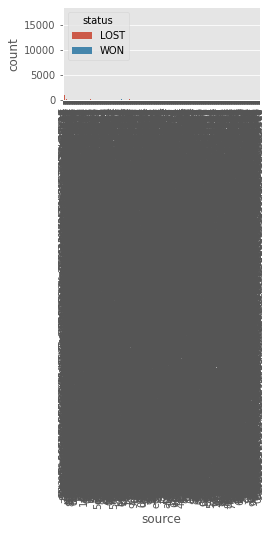

In [169]:
fig = plt.subplots(figsize=(12,12))

for i, feature in enumerate(['source']):
    plt.subplot(3,3,i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(v[feature], hue=v["status"])
    plt.xticks(rotation=90)
    plt.tight_layout()

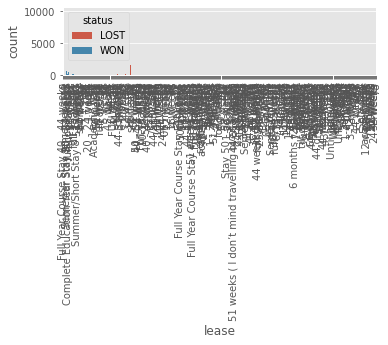

In [170]:
fig=plt.subplots(figsize=(10, 6))

for i, feature in enumerate(["lease"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(x=feature, hue="status", data=v)
    plt.xticks( rotation='vertical')
    plt.tight_layout()

**we should target the leads who have selected the lease term for the full course time

# Train  test split

In [171]:
# Putting feature variable to X
X = v.drop(['lead_id','status'], axis=1)
# Putting response variable to y
y = v['status']

print(y)

X.head()

0        LOST
1        LOST
2        LOST
3        LOST
4        LOST
         ... 
46603    LOST
46604    LOST
46605    LOST
46606    LOST
46607    LOST
Name: status, Length: 46317, dtype: object


,Unnamed: 0,Agent_id,lost_reason,budget,lease,source,source_city,source_country,utm_source,utm_medium,des_city,des_country
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,Not responding,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,Low budget,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,Low budget,0-0,0,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,Junk lead,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,NaN,NaN


In [172]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [173]:
scaler = StandardScaler()

X_train[['budget','lease']] = scaler.fit_transform(X_train[['budget','lease']])

X_train.head()

ValueError: could not convert string to float: '£241 - £300 Per week'

In [176]:
# Correlation between different numerical variables for both the Converted and not-converted cases
conv_corr = v.corr()

# Unstacking the correlation matrix to find out top correlations
conv_corr_unstacked = conv_corr.unstack().sort_values(kind="quicksort")
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Series([], dtype: float64)

# Model Building

In [177]:
# Logistic regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data). The types seen wereNone and const             float64
Unnamed: 0          int64
Agent_id           object
lost_reason        object
budget             object
lease              object
source             object
source_city        object
source_country     object
utm_source         object
utm_medium         object
des_city           object
des_country        object
dtype: object. The data was
43527    LOST
33863    LOST
13602     WON
38891    LOST
44728    LOST
         ... 
16392    LOST
79       LOST
12180    LOST
14224    LOST
38638     WON
Name: status, Length: 32421, dtype: object
and
        const  Unnamed: 0                                           Agent_id  \
43527    1.0       43527  ff614a1caf92ad2900b6dc8287175f32ed48afcfee68ae...   
33863    1.0       33863  44864c96fa1c36602f0d045b268981b6cab638a60fc207...   
13602    1.0       13602  f11a7d64cc0201a4ba1e60e00992d074dc6c46680bb7be...   
38891    1.0       38891  2fca346db656187102ce806ac732e06a62df0dbb2829e5...   
44728    1.0       44728  c077ad291c7b691b8defba867c1b937f16e878c1f3bdd5...   
...      ...         ...                                                ...   
16392    1.0       16392  2e18e12a751bac813306282d514103385d31398bdbb35d...   
79       1.0          79  fb3e2c0015ad5bcd60d7619ca575a56c15c5d2cd3f01f1...   
12180    1.0       12180  fb3e2c0015ad5bcd60d7619ca575a56c15c5d2cd3f01f1...   
14224    1.0       14224  2fca346db656187102ce806ac732e06a62df0dbb2829e5...   
38638    1.0       38638  fb3e2c0015ad5bcd60d7619ca575a56c15c5d2cd3f01f1...   

            lost_reason                budget  \
43527    Not responding  £241 - £300 Per week   
33863    Just Enquiring   £60 - £120 Per week   
13602               NaN   £60 - £120 Per week   
38891  Low availability                   180   
44728    Not responding   £60 - £120 Per week   
...                 ...                   ...   
16392        Short stay                   308   
79       Not interested                   175   
12180      Supply issue   £60 - £120 Per week   
14224  Low availability                   0-0   
38638               NaN                   160   

                                            lease  \
43527  Complete Education Year Stay 50 - 52 weeks   
33863         Full Year Course Stay 40 - 44 weeks   
13602  Complete Education Year Stay 50 - 52 weeks   
38891                            full-course-stay   
44728              Summer/Short Stay 8 - 12 weeks   
...                                           ...   
16392                                          51   
79                                             51   
12180         Full Year Course Stay 40 - 44 weeks   
14224                                           0   
38638                                          44   

                                                  source  \
43527  7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...   
33863  7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...   
13602  7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...   
38891  7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4db...   
44728  7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...   
...                                                  ...   
16392  9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d79...   
79                                                   NaN   
12180  7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...   
14224  ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...   
38638  7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...   

                                             source_city  \
43527  2ab8f487a0ac857ad748f80c87b5c777aba77d50e23cb8...   
33863  8ce79da91b54d28a69963ebaeaad102d57cd65a9dcdb4c...   
13602  23dd7cc42d2685018857b1dffe76ce9c7867542b0303ce...   
38891  860ac618e84042526889b02c3ed1ce9199744aff12d0fa...   
44728  b2586a6cef5690b74e9fb425f95f8fb3f1e18a4cdc3225...   
...                                                  ...   
16392  6649d1dda96bdc032e4e89c2a0ce555d6902c7f2151d0c...   
79                                                   NaN   
12180  66604e8e12ce442e70536b476b64c97eb1c93bdb96eebc...   
14224  2bbfde08fcd758e12995f1b57b5ba1e66181fcc081e26c...   
38638  e509e9f3fb8f1e6b3cee0b3e924eb6e533928aeca83653...   

                                          source_country  \
43527  e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...   
33863  054cc4501cf9b311905ae2a8fbaccbd93c87eb9038b6a2...   
13602  19a8d134581ecdd7c2cc20f5908014bd4c28e425a28ca7...   
38891  e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...   
44728  e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...   
...                                                  ...   
16392  cf3a9ac98c81ec1643e418e9647543cff130e4dc0b0b1f...   
79                                                   NaN   
12180  8da82000ef9c4468ba47362a924b895e40662fed846942...   
14224  e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...   
38638  e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...   

                                              utm_source  \
43527  bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...   
33863  bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...   
13602  bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...   
38891  bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...   
44728  bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...   
...                                                  ...   
16392  d15690f08a575024650b01ffac892cfd2b93e6c57c140f...   
79     3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...   
12180  bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...   
14224  bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...   
38638  bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...   

                                              utm_medium  \
43527  09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...   
33863  09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...   
13602  09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...   
38891  09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...   
44728  09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...   
...                                                  ...   
16392                                                NaN   
79     4ed379d418bb86290a01117e9ceb0debffc4d1b7087db6...   
12180  09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...   
14224  09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...   
38638  09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...   

                                                des_city  \
43527  2baa70fa96081bf1c4c7319e7af4bed170348d9c6821b4...   
33863  e34eb721eceb4f46181760c2f9b23b551419a518be82e6...   
13602  b2586a6cef5690b74e9fb425f95f8fb3f1e18a4cdc3225...   
38891  5e02dadaa7e4cd29809e2f8a115f1e5e9c01b29813a1fb...   
44728  b2586a6cef5690b74e9fb425f95f8fb3f1e18a4cdc3225...   
...                                                  ...   
16392  ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...   
79     ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...   
12180  ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...   
14224  9edff2628ff7385bffbe7fc9cae89010d2cb9182e805e1...   
38638  8593b9db65212160979d946950601c26622a219c80f1f1...   

                                             des_country  
43527  8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...  
33863  8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...  
13602  8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...  
38891  8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...  
44728  8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...  
...                                                  ...  
16392  8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...  
79     8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...  
12180  8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...  
14224  8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...  
38638  8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...  

[32421 rows x 13 columns]
before. After,
['LOST' 'LOST' 'WON' ... 'LOST' 'LOST' 'WON']
[[1.0 43527
  'ff614a1caf92ad2900b6dc8287175f32ed48afcfee68ae03b32b2ee5a8291849' ...
  '09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c'
  '2baa70fa96081bf1c4c7319e7af4bed170348d9c6821b4db2888d716967550b7'
  '8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512ff098eaa56a4d5fb19']
 [1.0 33863
  '44864c96fa1c36602f0d045b268981b6cab638a60fc207c89e3bba235f619450' ...
  '09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c'
  'e34eb721eceb4f46181760c2f9b23b551419a518be82e693b9387b8496a9b98b'
  '8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512ff098eaa56a4d5fb19']
 [1.0 13602
  'f11a7d64cc0201a4ba1e60e00992d074dc6c46680bb7be196073d26e53e45bf1' ...
  '09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c'
  'b2586a6cef5690b74e9fb425f95f8fb3f1e18a4cdc3225eb2f53534ec3602aee'
  '8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512ff098eaa56a4d5fb19']
 ...
 [1.0 12180
  'fb3e2c0015ad5bcd60d7619ca575a56c15c5d2cd3f01f18e68c4dfaeee585db5' ...
  '09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c'
  'ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7'
  '8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512ff098eaa56a4d5fb19']
 [1.0 14224
  '2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e' ...
  '09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c'
  '9edff2628ff7385bffbe7fc9cae89010d2cb9182e805e146de99e99cd4dfce61'
  '8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512ff098eaa56a4d5fb19']
 [1.0 38638
  'fb3e2c0015ad5bcd60d7619ca575a56c15c5d2cd3f01f18e68c4dfaeee585db5' ...
  '09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c'
  '8593b9db65212160979d946950601c26622a219c80f1f122679eb69ec5b96600'
  '8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512ff098eaa56a4d5fb19']].

In [180]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

NameError: name 'col' is not defined

In [181]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

NameError: name 'res' is not defined